In [6]:
import matplotlib.pyplot as plt
from src.competencies import get_job_title_to_competencies_employee, get_job_title_to_competencies_boss
from src.utilities import load_sav_data

employee_sav_df, employee_sav_meta, boss_sav_df, boss_sav_meta = load_sav_data()

In [42]:
employees_to_competencies = get_job_title_to_competencies_employee(
    df=employee_sav_df,
    df_meta=employee_sav_meta,
    prefix=None,
    depth=2,
)

In [3]:
boss_to_competencies = get_job_title_to_competencies_boss(
    df=boss_sav_df,
    df_meta=employee_sav_meta,
    prefix=None,
    depth=1,
)

In [43]:
employees_to_competencies / 5

,k01,k02,k03,k04,k05,k06,k07,k08,k09,k10,...,k15,k16,k17,k18,k19,k20,k21,k22,k23,k24
e10_isco_name,,,,,,,,,,,,,,,,,,,,,
"przedstawiciele władz publicznych, wyżsi urzędnicy i dyrektorzy generalni",0.852174,0.800000,0.834783,0.686957,0.539130,0.400000,0.913043,0.634783,0.539130,0.660870,...,0.921739,0.860870,0.878261,0.834783,0.638095,0.826087,0.852174,0.765217,0.869565,0.730435
kierownicy do spraw zarządzania i handlu,0.856250,0.850000,0.851613,0.756250,0.645161,0.468750,0.900000,0.712500,0.568750,0.725000,...,0.900000,0.850000,0.843750,0.862500,0.722581,0.825000,0.831250,0.762500,0.868750,0.651613
kierownicy do spraw produkcji i usług,0.854545,0.818182,0.836364,0.727273,0.772727,0.536364,0.872727,0.636364,0.500000,0.690909,...,0.881818,0.836364,0.790909,0.800000,0.681818,0.763636,0.836364,0.781818,0.854545,0.654545
"kierownicy w branży hotelarskiej, handlu i innych branżach usługowych",0.800000,0.800000,0.840000,0.666667,0.653333,0.493333,0.813333,0.560000,0.506667,0.693333,...,0.840000,0.826667,0.866667,0.840000,0.706667,0.626667,0.786667,0.760000,0.800000,0.653333
"specjaliści nauk fizycznych, matematycznych i technicznych",0.842857,0.838095,0.861905,0.766667,0.723810,0.590476,0.904762,0.761905,0.604762,0.700000,...,0.852381,0.828571,0.809524,0.800000,0.728571,0.776190,0.776190,0.728571,0.880952,0.700000
specjaliści do spraw zdrowia,0.760976,0.790244,0.760976,0.624390,0.580488,0.390244,0.824390,0.565854,0.536585,0.726829,...,0.814634,0.839024,0.785366,0.790244,0.614634,0.760976,0.673171,0.697561,0.843902,0.614634
specjaliści nauczania i wychowania,0.820930,0.827907,0.769767,0.583721,0.548837,0.432558,0.818605,0.581395,0.648837,0.653488,...,0.841860,0.830233,0.820930,0.846512,0.647619,0.755814,0.732558,0.744186,0.895349,0.551163
specjaliści do spraw ekonomicznych i zarządzania,0.808511,0.821277,0.834043,0.748936,0.646809,0.412766,0.880851,0.629787,0.540426,0.714894,...,0.859574,0.821277,0.825532,0.880851,0.720000,0.821277,0.740426,0.710638,0.855319,0.689362
specjaliści do spraw technologii informacyjno-komunikacyjnych,0.880000,0.820000,0.920000,0.830000,0.720000,0.590000,0.940000,0.740000,0.460000,0.680000,...,0.790000,0.830000,0.750000,0.770000,0.780000,0.720000,0.700000,0.700000,0.820000,0.560000


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
scaled_features = employees_to_competencies / 5

In [45]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, len(scaled_features.index)):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

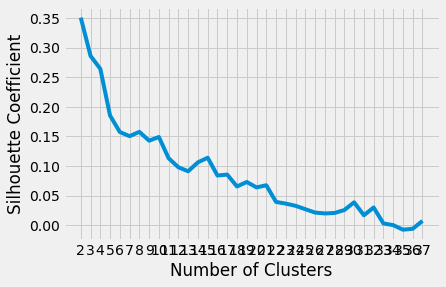

In [46]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, len(scaled_features.index)), silhouette_coefficients)
plt.xticks(range(2, len(scaled_features.index)))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [47]:
kmeans = KMeans(
    init="random",
    n_clusters=15,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
kmeans.labels_

array([14, 14,  1, 13,  1, 13,  7, 14,  1,  4,  2, 13, 13,  7,  1, 13, 13,
       10,  9,  9, 10,  3,  5, 12,  8,  0,  0,  2,  2,  5,  5,  5,  0, 12,
        6, 12, 11,  9], dtype=int32)

In [48]:
employees_to_competencies_clustered = employees_to_competencies.assign(cluster_type=kmeans.labels_)

In [49]:
cluster_types=employees_to_competencies_clustered.cluster_type.unique()
print(a)

[0 3 1 2]


In [50]:
employees_to_competencies_clustered[employees_to_competencies_clustered.cluster_type == 0]

,k01,k02,k03,k04,k05,k06,k07,k08,k09,k10,...,k16,k17,k18,k19,k20,k21,k22,k23,k24,cluster_type
e10_isco_name,,,,,,,,,,,,,,,,,,,,,
robotnicy budowlani i pokrewni (z wyłączeniem elektryków),3.553191,3.723404,2.851064,2.191489,3.829787,3.297872,3.553191,2.489362,2.234043,3.851064,...,3.893617,3.765957,3.695652,2.933333,2.106383,3.212766,3.425532,3.510638,3.234043,0
"robotnicy obróbki metali, mechanicy maszyn i urządzeń",3.590164,3.770492,3.213115,2.409836,4.032787,3.803279,3.918033,2.721311,2.704918,3.721311,...,4.016393,3.819672,3.672131,3.150000,2.442623,3.196721,3.295082,3.704918,2.852459,0
kierowcy i operatorzy pojazdów,3.625000,3.671875,3.281250,2.296875,3.718750,3.437500,3.859375,2.492063,2.156250,3.703125,...,3.953125,3.875000,3.750000,3.206349,2.750000,3.171875,3.343750,3.687500,3.750000,0


/tmp/ipykernel_112447/3713832741.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


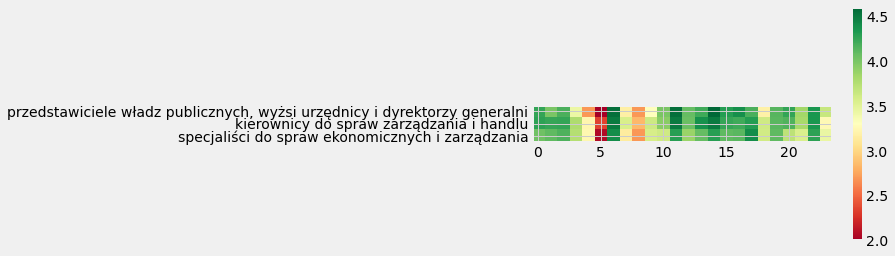

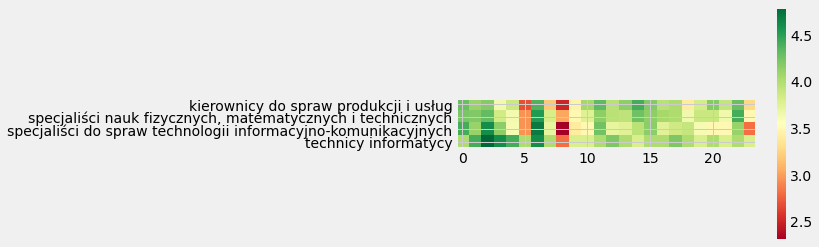

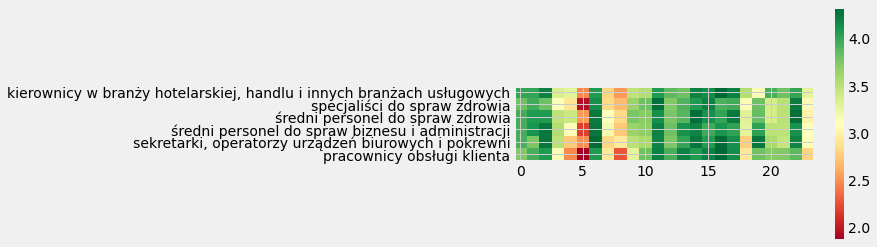

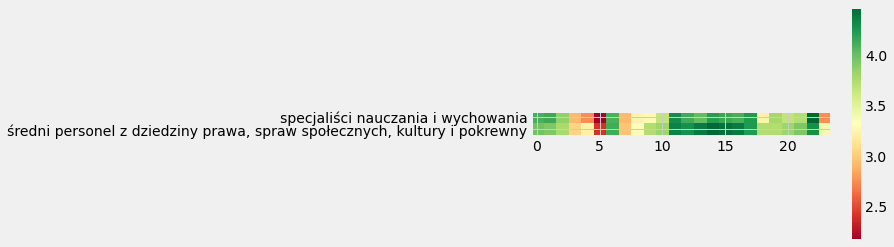

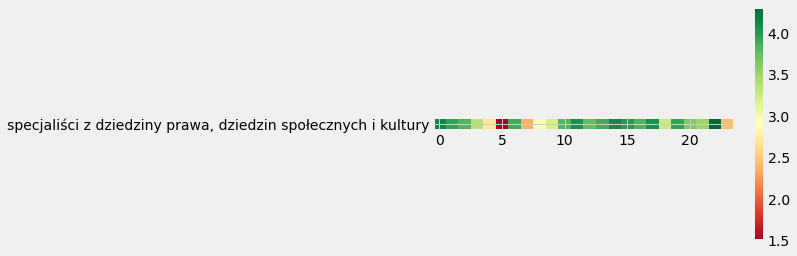

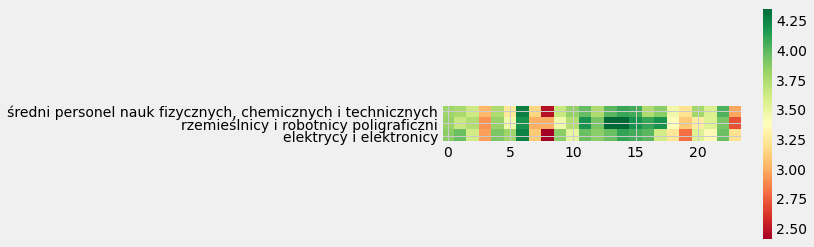

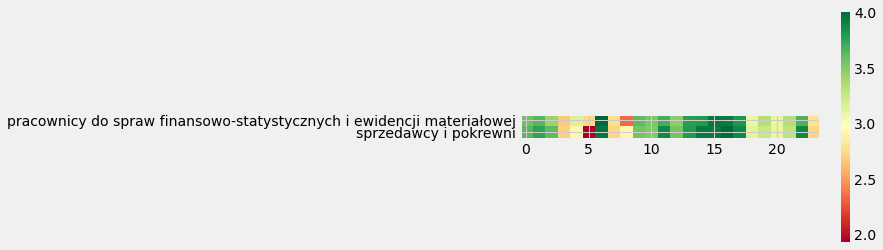

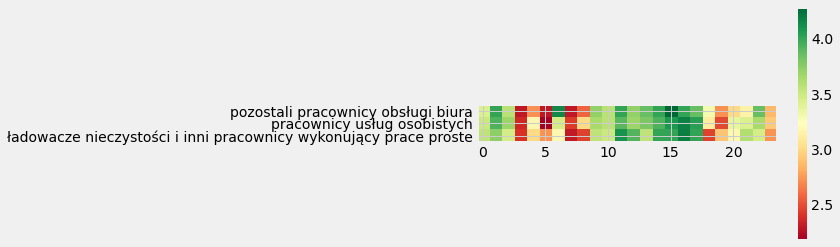

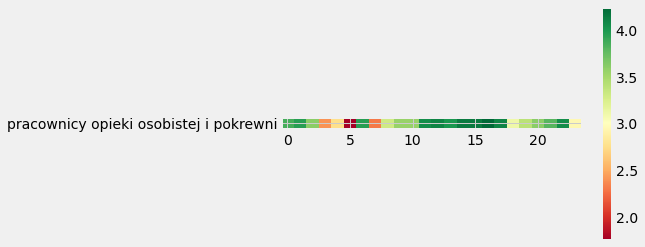

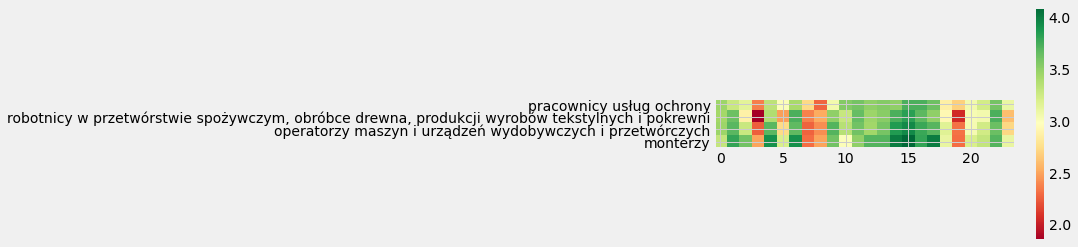

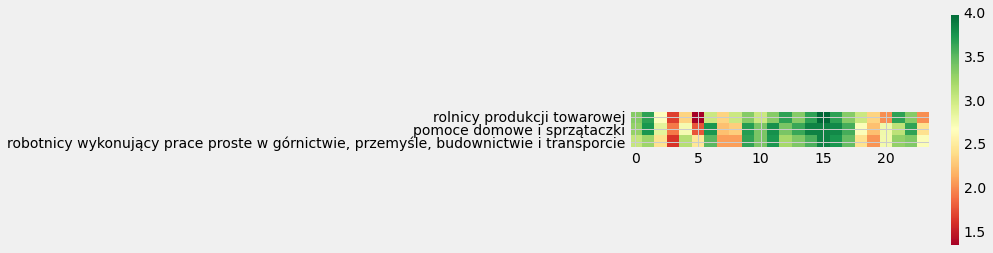

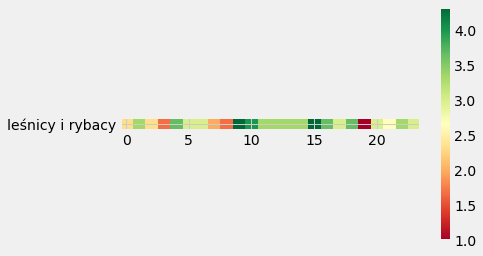

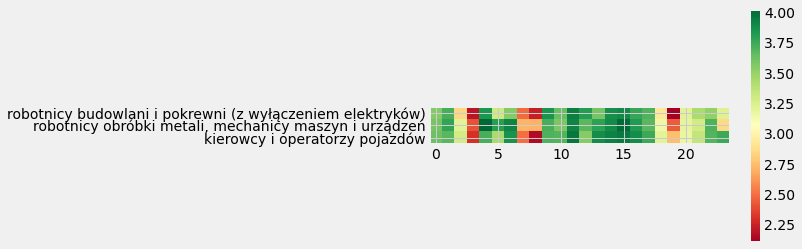

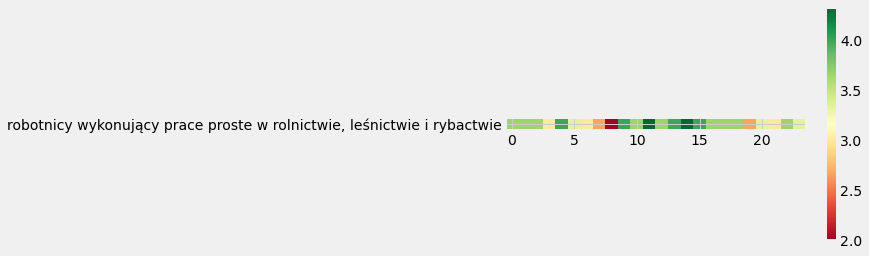

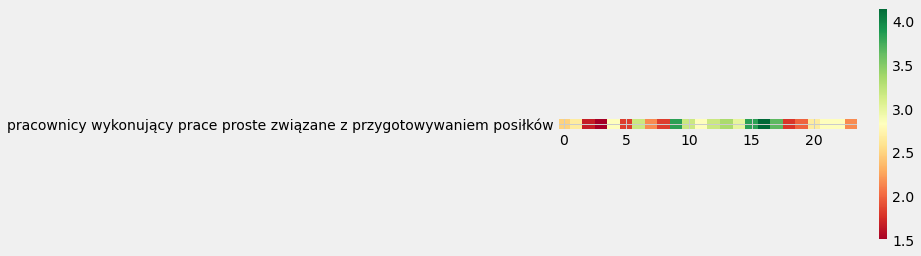

In [52]:
for elem in cluster_types:
    job_title_group = employees_to_competencies_clustered[employees_to_competencies_clustered.cluster_type == elem]
    del job_title_group["cluster_type"]
    plt.imshow(job_title_group, cmap = "RdYlGn")
    plt.colorbar()
    plt.yticks(range(len(job_title_group)), job_title_group.index)
    plt.show()

In [30]:
employees_to_competencies_clustered

,k01,k02,k03,k04,k05,k06,k07,k08,k09,k10,...,k16,k17,k18,k19,k20,k21,k22,k23,k24,cluster_type
e10_isco_name,,,,,,,,,,,,,,,,,,,,,
kierownicy,4.228261,4.108696,4.208791,3.586957,3.252747,2.358696,4.413043,3.250000,2.673913,3.478261,...,4.228261,4.217391,4.184783,3.449438,3.891304,4.152174,3.836957,4.271739,3.362637,0
specjaliści,4.087302,4.095238,4.035714,3.384921,3.071429,2.261905,4.261905,3.119048,2.920635,3.428571,...,4.138889,4.023810,4.138889,3.399194,3.857143,3.642857,3.607143,4.345238,3.043651,0
technicy i inny średni personel,3.915152,4.006061,4.036364,3.381818,3.333333,2.524390,4.242424,3.151515,2.781818,3.672727,...,4.072727,4.054545,4.042424,3.407407,3.781818,3.603659,3.579268,4.133333,3.127273,0
pracownicy biurowi,3.662500,3.750000,3.725000,2.887500,2.900000,2.487500,4.100000,2.762500,2.462500,3.537500,...,4.050000,4.087500,3.937500,3.013333,3.550000,3.291139,3.412500,3.825000,2.862500,3
pracownicy usług i sprzedawcy,3.609589,3.739726,3.554795,2.541096,3.000000,2.109589,3.780822,2.609589,2.883562,3.493151,...,3.958904,4.027397,3.903448,3.075342,3.041379,3.205479,3.376712,3.815068,2.854167,3
"rolnicy, ogrodnicy, leśnicy i rybacy",2.833333,3.500000,2.500000,1.666667,3.000000,2.166667,3.000000,2.166667,2.333333,3.833333,...,4.166667,3.666667,3.166667,3.333333,1.666667,2.500000,3.166667,3.333333,2.500000,1
robotnicy przemysłowi i rzemieślnicy,3.586592,3.737430,3.117318,2.318436,3.804469,3.351955,3.832402,2.642458,2.525140,3.703911,...,3.955056,3.810056,3.662921,3.063953,2.342697,3.206704,3.296089,3.698324,2.926966,2
operatorzy i monterzy maszyn i urządzeń,3.522388,3.686567,3.298507,2.291045,3.716418,3.104478,3.776119,2.375940,2.298507,3.694030,...,3.955224,3.828358,3.744361,3.174242,2.522388,3.112782,3.291045,3.664179,3.238806,2
pracownicy wykonujący prace proste,3.180556,3.458333,2.722222,1.887324,2.972222,2.236111,3.486111,2.197183,2.194444,3.680556,...,3.875000,3.861111,3.611111,2.535211,2.263889,2.845070,3.200000,3.444444,2.583333,1


In [29]:
employees_to_competencies

,k01,k02,k03,k04,k05,k06,k07,k08,k09,k10,...,k15,k16,k17,k18,k19,k20,k21,k22,k23,k24
e10_isco_name,,,,,,,,,,,,,,,,,,,,,
kierownicy,4.228261,4.108696,4.208791,3.586957,3.252747,2.358696,4.413043,3.250000,2.673913,3.478261,...,4.456522,4.228261,4.217391,4.184783,3.449438,3.891304,4.152174,3.836957,4.271739,3.362637
specjaliści,4.087302,4.095238,4.035714,3.384921,3.071429,2.261905,4.261905,3.119048,2.920635,3.428571,...,4.186508,4.138889,4.023810,4.138889,3.399194,3.857143,3.642857,3.607143,4.345238,3.043651
technicy i inny średni personel,3.915152,4.006061,4.036364,3.381818,3.333333,2.524390,4.242424,3.151515,2.781818,3.672727,...,4.206061,4.072727,4.054545,4.042424,3.407407,3.781818,3.603659,3.579268,4.133333,3.127273
pracownicy biurowi,3.662500,3.750000,3.725000,2.887500,2.900000,2.487500,4.100000,2.762500,2.462500,3.537500,...,3.950000,4.050000,4.087500,3.937500,3.013333,3.550000,3.291139,3.412500,3.825000,2.862500
pracownicy usług i sprzedawcy,3.609589,3.739726,3.554795,2.541096,3.000000,2.109589,3.780822,2.609589,2.883562,3.493151,...,3.897260,3.958904,4.027397,3.903448,3.075342,3.041379,3.205479,3.376712,3.815068,2.854167
"rolnicy, ogrodnicy, leśnicy i rybacy",2.833333,3.500000,2.500000,1.666667,3.000000,2.166667,3.000000,2.166667,2.333333,3.833333,...,3.500000,4.166667,3.666667,3.166667,3.333333,1.666667,2.500000,3.166667,3.333333,2.500000
robotnicy przemysłowi i rzemieślnicy,3.586592,3.737430,3.117318,2.318436,3.804469,3.351955,3.832402,2.642458,2.525140,3.703911,...,3.899441,3.955056,3.810056,3.662921,3.063953,2.342697,3.206704,3.296089,3.698324,2.926966
operatorzy i monterzy maszyn i urządzeń,3.522388,3.686567,3.298507,2.291045,3.716418,3.104478,3.776119,2.375940,2.298507,3.694030,...,3.895522,3.955224,3.828358,3.744361,3.174242,2.522388,3.112782,3.291045,3.664179,3.238806
pracownicy wykonujący prace proste,3.180556,3.458333,2.722222,1.887324,2.972222,2.236111,3.486111,2.197183,2.194444,3.680556,...,3.718310,3.875000,3.861111,3.611111,2.535211,2.263889,2.845070,3.200000,3.444444,2.583333


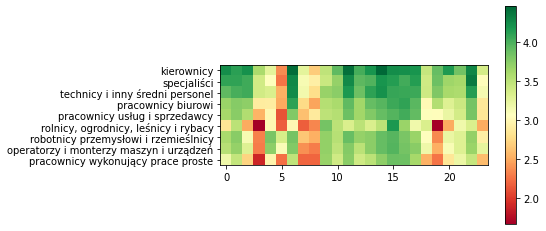

In [4]:
plt.imshow(employees_to_competencies, cmap = "RdYlGn")
plt.colorbar()
plt.yticks(range(len(employees_to_competencies)), employees_to_competencies.index)
plt.show()

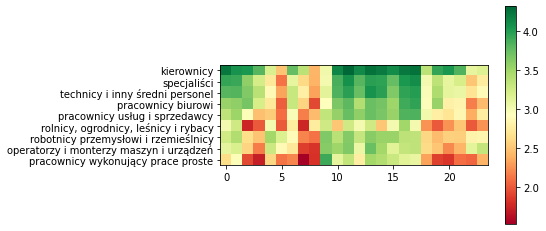

In [5]:
plt.imshow(boss_to_competencies, cmap = "RdYlGn")
plt.colorbar()
plt.yticks(range(len(boss_to_competencies)), boss_to_competencies.index)
plt.show()